In [8]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set the font family to Arial
plt.rcParams['font.family'] = 'Arial'

# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'cover_overview.csv')

# Load the CSV file
df = pd.read_csv(file_path)

# Drop the first column by index
df = df.drop(df.columns[0], axis=1)

# Renaming columns
df.rename(
    columns={'WMU ': 'WMU', 'Simulation': 'Simulation', 'Design': 'Design', 'Mean_Sampler_Count': 'Mean sampler count',
             'Mean_Cover_Area': 'Mean cover area (km2)', 'Mean_Cover_Percentage': 'Mean cover (%)',
             'Mean_Line_Length': 'Mean line length (km)', 'Mean_Trackline_Length': 'Mean trackline length (km)',
             'Mean_Cyclic_Trackline_Length': 'Mean cyclic trackline length (km)',
             'Mean_On_Effort': 'Mean on effort (km)', 'Mean_Off_Effort': 'Mean off effort (km)',
             'Mean_Return_to_Home': 'Mean return to home (km)',
             'Mean_Off_Effort_Return': 'Mean off effort & return (km)', 'On_Effort_Percentage': 'On effort (%)',
             'Off_Effort_Percentage': 'Off effort (%)', 'Return_to_Home_Percentage': 'Return to home (%)',
             'Off_Effort_Return_Percentage': 'Off effort & return (%)', 'Number_of_Plots': 'Number of plots'},
    inplace=True)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'FW-Sys-2C': 'Fixed-wing Systematic 2 Cameras',
    'FW-ZZ-2C': 'Fixed-wing Zigzag 2 Cameras',
    'FW-Sys-G': 'Fixed-wing Systematic Gimbal',
    'FW-ZZ-G': 'Fixed-wing Zigzag Gimbal',
    'QC-Sys-NADIR': 'Quadcopter NADIR',
    'QC-Sys': 'Quadcopter Gimbal',
    'H-SG': 'Helicopter',
}
# # Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)

# Convert the Simulation column to a categorical type with the specified order
# df['Simulation'] = pd.Categorical(df['Simulation'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the Simulation column
df = df.sort_values('Simulation')


In [9]:
print(df)
print(df.columns)

    WMU                       Simulation         Design  Mean sampler count  \
0   501  Fixed-wing Systematic 2 Cameras     systematic               118.3   
14  512  Fixed-wing Systematic 2 Cameras     systematic               324.3   
21  517  Fixed-wing Systematic 2 Cameras     systematic               220.0   
7   503  Fixed-wing Systematic 2 Cameras     systematic               147.0   
28  528  Fixed-wing Systematic 2 Cameras     systematic               614.1   
22  517     Fixed-wing Systematic Gimbal     systematic               220.0   
15  512     Fixed-wing Systematic Gimbal     systematic               324.4   
8   503     Fixed-wing Systematic Gimbal     systematic               147.0   
1   501     Fixed-wing Systematic Gimbal     systematic               118.3   
29  528     Fixed-wing Systematic Gimbal     systematic               614.2   
30  528      Fixed-wing Zigzag 2 Cameras       eszigzag               582.4   
9   503      Fixed-wing Zigzag 2 Cameras       eszig

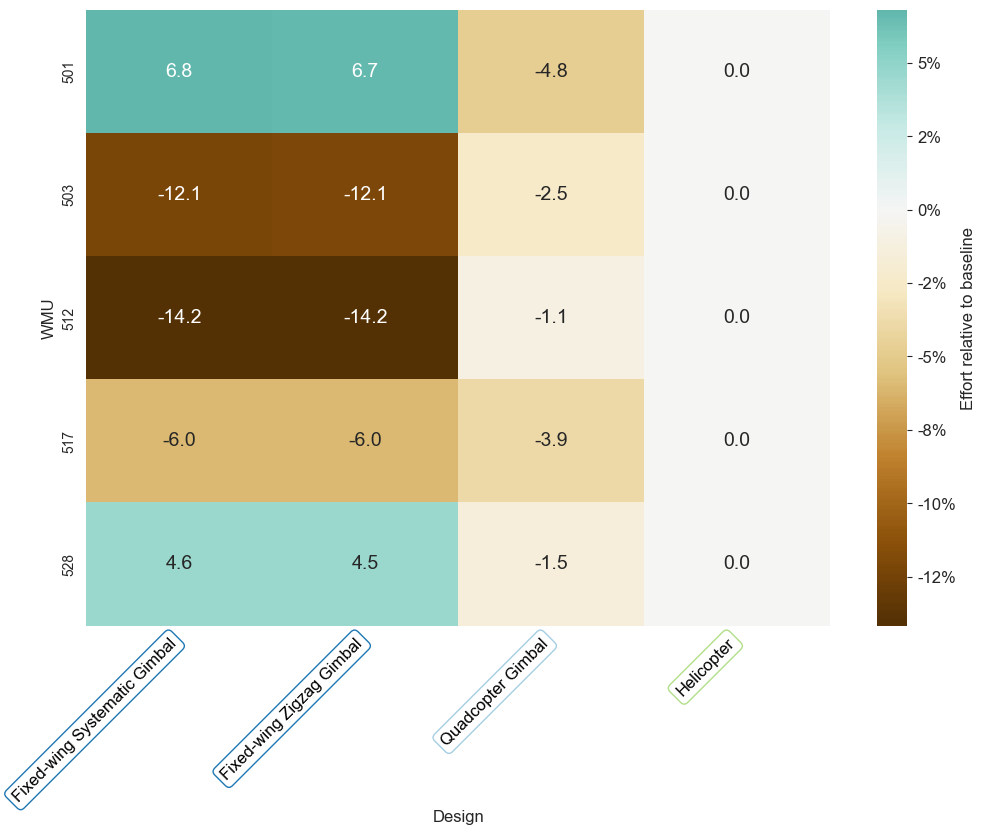

In [10]:
# Filter the DataFrame to include only relevant columns
df_filtered = df[['WMU', 'Simulation', 'Mean line length (km)']]

# Select only the desired simulations
desired_simulations = ['Fixed-wing Systematic Gimbal', 'Fixed-wing Zigzag Gimbal', 'Quadcopter Gimbal',
                       'Helicopter']  # Replace with your actual simulation names
df_filtered = df_filtered[df_filtered['Simulation'].isin(desired_simulations)]

# Manually order by simulations with 'Helicopter' in the last position
df_filtered['Simulation'] = pd.Categorical(df_filtered['Simulation'], categories=desired_simulations, ordered=True)
df_filtered = df_filtered.sort_values('Simulation')

# Pivot the DataFrame to have WMU as index and Simulation as columns
df_pivot = df_filtered.pivot(index='WMU', columns='Simulation', values='Mean line length (km)')

# Calculate the proportional difference from H-SG for each WMU
df_diff = df_pivot.subtract(df_pivot['Helicopter'], axis=0).divide(df_pivot['Helicopter'], axis=0) * 100

# Create the heatmap
plt.figure(figsize=(12, 8))


# Define a custom annotation function to add a percentage sign
def annot_format(data):
    return f'{data:.1f}%'


ax = sns.heatmap(df_diff, cmap='BrBG', center=0, annot=True, fmt='.1f', annot_kws={"size": 14},
                 cbar_kws={'format': '%.0f%%'})

# Define colors for each group of simulations
colors = ['#1f78b4', '#1f78b4', '#a6cee3', '#b2df8a']

# Add colored borders around the x-axis labels
for tick_label, color in zip(ax.get_xticklabels(), colors):
    tick_label.set_bbox(dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))

# Keep the font color black
for tick_label in ax.get_xticklabels():
    tick_label.set_color('black')

# Rotate x-axis labels to 45 degrees and increase font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add labels and title
plt.xlabel('Design', fontsize=12)
plt.ylabel('WMU', fontsize=12)

# Add a legend for the color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Effort relative to baseline', size=12)
cbar.ax.tick_params(labelsize=12)

# Save the plot as a TIFF file to the specified relative path
output_path = os.path.join('..', '..', 'Output', 'Plots', 'relEffortHeatmap.tiff')
plt.savefig(output_path, format='tiff', dpi=300, bbox_inches='tight')

plt.show()

In [11]:
# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'coverage_score.csv')

# Load the CSV file
coverage_df = pd.read_csv(file_path)

# Drop the first column by index
coverage_df = coverage_df.drop(coverage_df.columns[0], axis=1)

# Renaming columns
coverage_df.rename(
    columns={'Simulation': 'Simulation', 'Min  ': 'Min  ', 'First_Qu': 'First quantile', 'Median': 'Median',
             'Mean': 'Mean', 'Third_Qu': 'Third quantile', 'Max': 'Max', 'Group': 'Group'}, inplace=True)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'FW_Sys_2C': 'Fixed-wing Systematic 2 Cameras',
    'FW_ZZ_2C': 'Fixed-wing Zigzag 2 Cameras',
    'FW_Sys_G': 'Fixed-wing Systematic Gimbal',
    'FW_ZZ_G': 'Fixed-wing Zigzag Gimbal',
    'QC_Sys_nadir': 'Quadcopter NADIR',
    'QC_Sys': 'Quadcopter Gimbal',
    'H_SG': 'Helicopter',
}

# Renaming the simulations
coverage_df['Group'] = coverage_df['Group'].replace(simulation_rename_dict)

# Define the custom order for the groups
custom_order = ['Fixed-wing Systematic 2 Cameras', 'Fixed-wing Zigzag 2 Cameras', 'Fixed-wing Systematic Gimbal',
                'Fixed-wing Zigzag Gimbal', 'Quadcopter NADIR', 'Quadcopter Gimbal', 'Helicopter']

# Convert the Group column to a categorical type with the specified order
coverage_df['Group'] = pd.Categorical(coverage_df['Group'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the Group column
coverage_df = coverage_df.sort_values('Group')

# Define custom colors for each group
group_colors = {
    "Fixed-wing Systematic 2 Cameras": "#1f78b4",  # Orange
    "Fixed-wing Zigzag 2 Cameras": "#1f78b4",  # Purple
    "Fixed-wing Systematic Gimbal": "#1f78b4",  # Orange
    "Fixed-wing Zigzag Gimbal": "#1f78b4",  # Purple
    "Quadcopter NADIR": "#a6cee3",  # Dark Purple
    "Quadcopter Gimbal": "#a6cee3",  # Dark Purple
    "Helicopter": "#b2df8a"  # Pink
}


In [12]:
print(coverage_df)
print(coverage_df.columns)

                 Simulation   Min  First quantile  Median      Mean  \
0      FW_Sys_2C_design_501  0.00            0.00    0.41  0.281338   
1      FW_Sys_2C_design_503  0.00            0.00    0.37  0.234708   
2      FW_Sys_2C_design_512  0.00            0.00    0.33  0.225989   
3      FW_Sys_2C_design_517  0.00            0.00    0.38  0.244992   
4      FW_Sys_2C_design_528  0.00            0.00    0.40  0.276106   
14      FW_ZZ_2C_design_528  0.00            0.00    0.40  0.278194   
13      FW_ZZ_2C_design_517  0.00            0.00    0.37  0.247447   
12      FW_ZZ_2C_design_512  0.00            0.00    0.31  0.226722   
11      FW_ZZ_2C_design_503  0.00            0.00    0.33  0.232175   
10      FW_ZZ_2C_design_501  0.00            0.00    0.40  0.284001   
8       FW_Sys_G_design_517  0.00            0.00    0.57  0.357968   
7       FW_Sys_G_design_512  0.00            0.00    0.46  0.326135   
6       FW_Sys_G_design_503  0.00            0.00    0.56  0.335741   
5     

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_12792\2668678862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Mean', data=coverage_df, palette=palette)


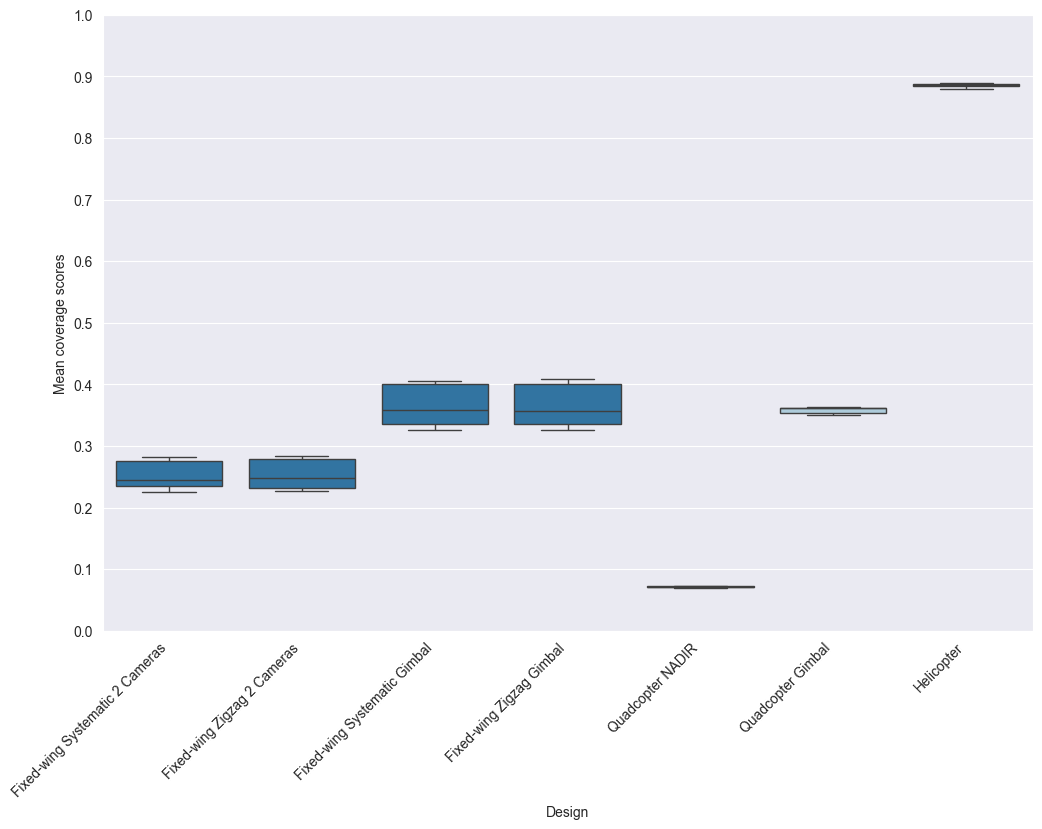

In [13]:
# Create a color palette based on the group colors
palette = [group_colors[group] for group in coverage_df['Group'].unique()]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Mean', data=coverage_df, palette=palette)

# Create custom legend
# handles = [mpatches.Patch(color=color, label=group) for group, color in group_colors.items()]
# plt.legend(handles=handles, title='Group')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45, ha='right')

plt.xlabel('Design')
plt.ylabel('Mean coverage scores')

# Set y-axis ticks from 0 to 1 at steps of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# Save the plot as a TIFF file to the specified relative path
output_path = os.path.join('..', '..', 'Output', 'Plots', 'meanCoverage.tiff')
plt.savefig(output_path, format='tiff', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
coverage_df

,Simulation,Min,First quantile,Median,Mean,Third quantile,Max,Group
0,FW_Sys_2C_design_501,0.00,0.00,0.41,0.281338,0.46,0.60,Fixed-wing Systematic 2 Cameras
1,FW_Sys_2C_design_503,0.00,0.00,0.37,0.234708,0.46,0.58,Fixed-wing Systematic 2 Cameras
2,FW_Sys_2C_design_512,0.00,0.00,0.33,0.225989,0.46,0.60,Fixed-wing Systematic 2 Cameras
3,FW_Sys_2C_design_517,0.00,0.00,0.38,0.244992,0.45,0.63,Fixed-wing Systematic 2 Cameras
4,FW_Sys_2C_design_528,0.00,0.00,0.40,0.276106,0.46,0.60,Fixed-wing Systematic 2 Cameras
14,FW_ZZ_2C_design_528,0.00,0.00,0.40,0.278194,0.46,0.68,Fixed-wing Zigzag 2 Cameras
13,FW_ZZ_2C_design_517,0.00,0.00,0.37,0.247447,0.46,0.68,Fixed-wing Zigzag 2 Cameras
12,FW_ZZ_2C_design_512,0.00,0.00,0.31,0.226722,0.45,0.68,Fixed-wing Zigzag 2 Cameras
11,FW_ZZ_2C_design_503,0.00,0.00,0.33,0.232175,0.45,0.66,Fixed-wing Zigzag 2 Cameras
10,FW_ZZ_2C_design_501,0.00,0.00,0.40,0.284001,0.47,0.62,Fixed-wing Zigzag 2 Cameras


C:\Users\lhambrec\AppData\Local\Temp\ipykernel_12792\1322486682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = coverage_df.groupby('Group').agg({
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_12792\1322486682.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Value', data=melted_df, palette=palette)


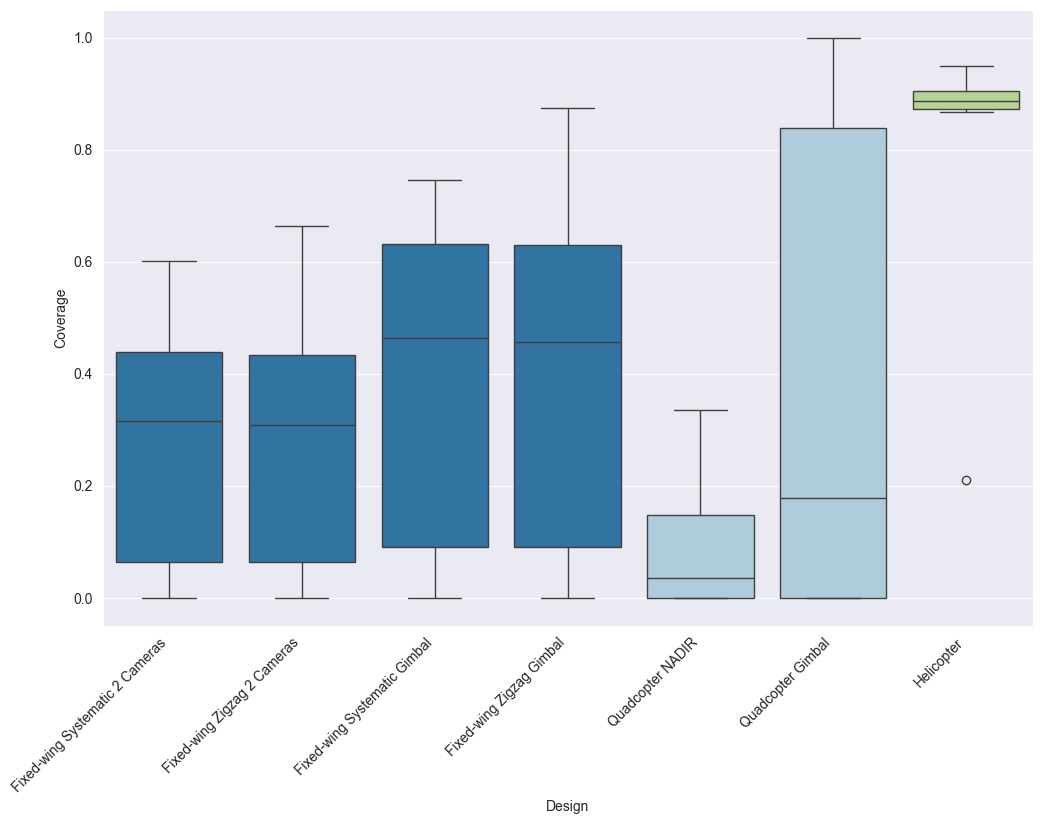

In [15]:
# Calculate the required statistics for each simulation
aggregated_df = coverage_df.groupby('Group').agg({
    'Min': 'mean',
    'First quantile': 'mean',
    'Median': 'mean',
    'Mean': 'mean',
    'Third quantile': 'mean',
    'Max': 'mean'
}).reset_index()

# Melt the dataframe
melted_df = aggregated_df.melt(id_vars=['Group'], var_name='Metric', value_name='Value')

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Value', data=melted_df, palette=palette)

# Create custom legend
# handles = [mpatches.Patch(color=color, label=group) for group, color in group_colors.items()]
# plt.legend(handles=handles, title='Design')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45, ha='right')

plt.xlabel('Design')
plt.ylabel('Coverage')
# plt.title('Box Plot Grouped by Simulation with Custom Colors')
plt.show()